# Clustering Features

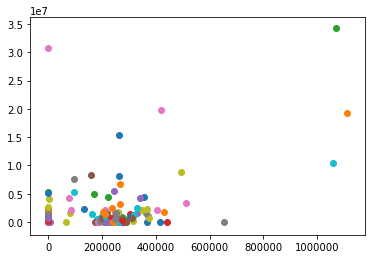

no predictions object named pred found, no clusters to plot


In [1]:
""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")


### What features will your clustering algorithm use?
* salary
* exercised_stock_options

### Deploying Clustering
Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?

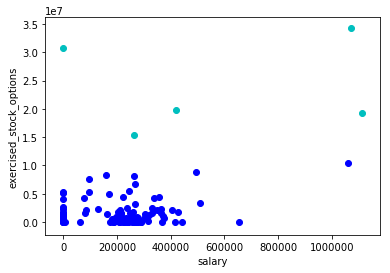

In [2]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
classifier = KMeans(n_clusters=2, max_iter=500, n_init=20)
classifier.fit(finance_features)
pred = classifier.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

### Clustering with 3 Features
Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

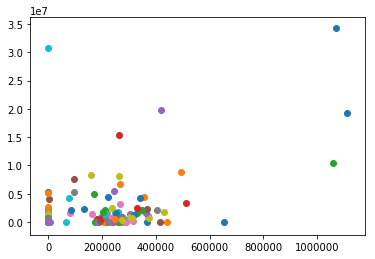

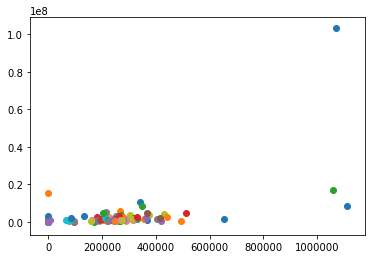

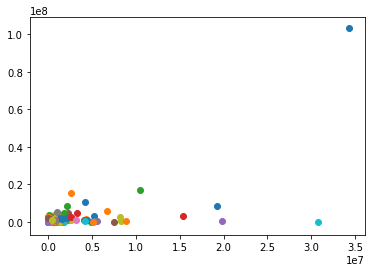

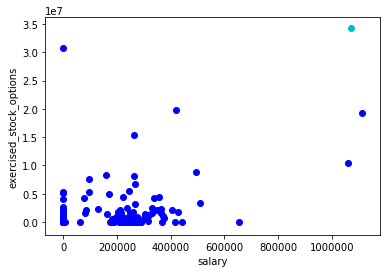

In [3]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

# KMeans uses a distance metric to determine which points are in which cluster.
# By adding a 3rd variable, you are changing the problem from a 2D metric to a 3D metric
# (obviously, you are only viewing the solution in 2D, but KMeans is 'clustering' the points in 3D).
# _ is a placeholder (it is standard notation used by python programmers for 'I don't care about that variable').
# If you plot f.i. over f1 and f3 you see that there is one point far away from all the others,
# which explains the 2 clusters you see above.
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f3 )
plt.show()

for f1, f2, f3 in finance_features:
    plt.scatter( f2, f3 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
classifier = KMeans(n_clusters=2, max_iter=500, n_init=20)
classifier.fit(finance_features)
pred = classifier.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

### When you add another feature, do any points switch clusters?
* Yes, four points switch clusters

### Stock Option Range
In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [4]:
# Create the floating-point values of negative infinity and infinity.
max_value = float("-inf")
min_value = float("inf")

for k, v in data_dict.items():
    if v["exercised_stock_options"] != "NaN":
        if v["exercised_stock_options"] > max_value:
            max_value = v["exercised_stock_options"]
        if v["exercised_stock_options"] < min_value:
            min_value = v["exercised_stock_options"]

print("max_value: ",max_value)
print("min_value: ",min_value)

max_value:  34348384
min_value:  3285


### Salary Range
What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [5]:
# Create the floating-point values of negative infinity and infinity.
max_value = float("-inf")
min_value = float("inf")

for k, v in data_dict.items():
    if v["salary"] != "NaN":
        if v["salary"] > max_value:
            max_value = v["salary"]
        if v["salary"] < min_value:
            min_value = v["salary"]

print("max_value: ",max_value)
print("min_value: ",min_value)

max_value:  1111258
min_value:  477


### Clustering Changes
The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?

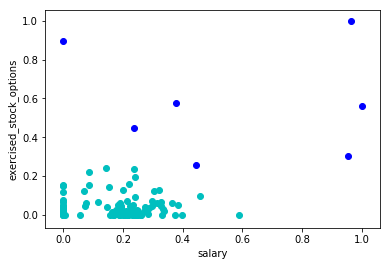

rescaled salary (200000.0) is: 0.17962406631
rescaled exercised_stock_options (1000000.0) is: 0.0290205889347


In [6]:
from sklearn.preprocessing import MinMaxScaler

def fit_scaler_on_original_data(data_dict, feature):

    feature_not_NaN = []
    for person in data_dict.keys():
        if data_dict[person][feature] != "NaN":
            feature_not_NaN.append(data_dict[person][feature])
    
    scaler = MinMaxScaler()
    scaler.fit(numpy.array(feature_not_NaN, dtype = numpy.float).reshape(-1, 1))
    
    return scaler

feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list)

# Fit a scaler on the original data (So we don't get deceived by the "NaN" points)
feature_1_scaler = fit_scaler_on_original_data(data_dict, feature_1)
feature_2_scaler = fit_scaler_on_original_data(data_dict, feature_2)

# Rescale the data using the appropriate scaler
rescaled_data = data
rescaled_data[:, 1] = feature_1_scaler.transform(rescaled_data[:, 1].reshape(1, -1))
rescaled_data[:, 2] = feature_2_scaler.transform(rescaled_data[:, 2].reshape(1, -1))

poi, finance_features = targetFeatureSplit(rescaled_data)

classifier = KMeans(n_clusters=2, random_state = 100)
pred = classifier.fit_predict(finance_features)

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_with_feature_scaling.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")
    
    
print("rescaled salary (200000.0) is:", feature_1_scaler.transform([[200000.0]])[0][0])
print("rescaled exercised_stock_options (1000000.0) is:", feature_2_scaler.transform([[1000000.0]])[0][0])